# GPU Accelerated dimensionality reduction with TSNE in online setting

Context: We have a dataset $\mathcal{D}$ of $n$-dimensional vectors that continually grows. What we want is to maintain a TSNE model for dimensionality reduction to 2-dimensions that is fitted to $\mathcal{D}$.

In [2]:
import torch
from tsne_torch import TorchTSNE as TSNE
# Example PyTorch tensor
tensor_data = torch.randn(1000, 50).cuda()  # 1000 samples, 50 features, on GPU

# Apply t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=False)
tsne_results = tsne.fit_transform(tensor_data)

# tsne_results is a PyTorch tensor on GPU
print(tsne_results)

[[-19.82567    6.429161]
 [  8.304232 -22.98125 ]
 [ 12.984289  11.704607]
 ...
 [  3.14165    7.954202]
 [ -9.02894   -5.277506]
 [  7.75434  -15.204917]]


In [1]:
import torch
from openTSNE import TSNE
from openTSNE import initialization

# Initialize a PyTorch tensor
initial_data = torch.randn(500, 50, device='cpu')  # Initial 500 samples, 50 features

# Convert PyTorch tensor to CuPy array
initial_data = initial_data.numpy()

# Initialize t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=True)
init = initialization.pca(initial_data)
embedding = tsne.fit(initial_data, initialization=init)

# Incrementally add new data points
new_data = torch.randn(100, 50, device='cuda')  # New 100 samples, 50 features
new_data = cp.asarray(new_data.cpu().numpy())
embedding.transform(new_data, n_iter=200, inplace=True)

# Convert the final embedding back to PyTorch tensor if needed
final_embedding = torch.tensor(cp.asnumpy(embedding), device='cuda')

print(final_embedding)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=300, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.05 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=8.33 for 250 iterations...
Iteration   50, KL divergence 0.1766, 50 iterations in 0.0643 sec
Iteration  100, KL divergence -2.8914, 50 iterations in 0.0153 sec
Iteration  150, KL divergence 1.0257, 50 iterations in 0.0077 sec
Iteration  200, KL divergence 1.0257, 50 iterations in 0.0073 sec
Iteration  250, KL divergence 1.0257, 50 iterations in 0.0094 sec
   --> Time elapsed: 0.10 seconds
===> Running optimization with exaggeration=1.00, lr=100.00 for 300 iterations...
Iteration   50, KL divergence 0.7582, 50 iterations in 0.0415 sec
Itera

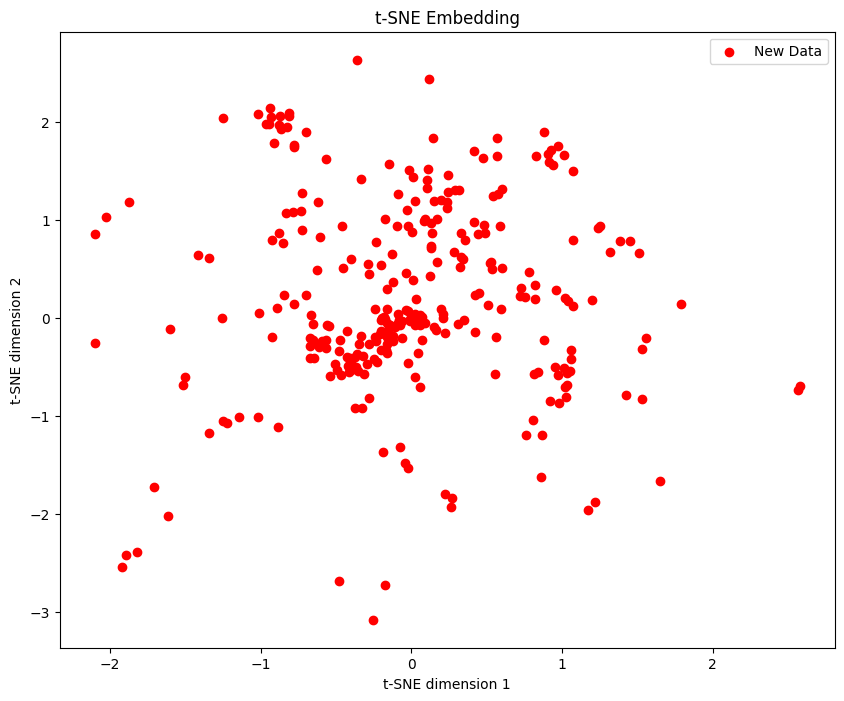

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from openTSNE import TSNE
from openTSNE import initialization

# Initialize a NumPy array
initial_data = np.random.randn(100, 50)  # Initial 500 samples, 50 features

# Initialize t-SNE
tsne = TSNE(perplexity=30, n_iter=300, verbose=True)
init = initialization.pca(initial_data)
embedding = tsne.fit(initial_data, initialization=init)

# Incrementally add new data points
new_data = np.random.randn(300, 50)  # New 100 samples, 50 features
embedding = embedding.transform(new_data, n_iter=200)

# The final embedding is a NumPy array
final_embedding = embedding

print(final_embedding)

# Plot the initial embedding
plt.figure(figsize=(10, 8))
# plt.scatter(embedding[:, 0], embedding[:, 1], c='blue', label='Initial Data')
plt.scatter(final_embedding[:, 0], final_embedding[:, 1], c='red', label='New Data')
plt.title('t-SNE Embedding')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend()
plt.show()

In [33]:
import gymnasium as gym
import numpy as np

def generate_uniform_samples(lower_bounds, upper_bounds, n_samples):
    """
    Generates uniform random samples within specified lower and upper bounds for each dimension.

    :param lower_bounds: List or array of lower bounds for each dimension.
    :param upper_bounds: List or array of upper bounds for each dimension.
    :param n_samples: Number of samples to generate.
    :return: Array of generated samples with shape (n_samples, input_dim).
    """
    input_dim = len(lower_bounds)
    samples = np.zeros((n_samples, input_dim))
    
    for i in range(input_dim):
        samples[:, i] = np.random.uniform(lower_bounds[i], upper_bounds[i], size=n_samples)
    
    return samples

# Example usage
lower_bounds = [-1, -2, 0]  # Lower bounds for each dimension
upper_bounds = [1, 3, 5]    # Upper bounds for each dimension
n_samples = 10000            # Number of samples to generate

env = gym.make("CartPole-v1")

generated_samples = generate_uniform_samples(env.observation_space.low, env.observation_space.high, n_samples)

print(generated_samples)

[[ 2.62754734e+00 -5.49570609e+37 -6.67584661e-02  1.36301589e+38]
 [-5.19234709e-01  1.76848864e+38  5.61042303e-02  1.37986790e+38]
 [-2.65166656e+00  2.13197877e+38 -1.18117070e-01  1.51558855e+38]
 ...
 [-4.31978477e+00 -3.28802154e+38  3.86778725e-01  1.81199843e+38]
 [-1.24630233e-02  8.11102814e+37 -1.48598820e-01 -9.05578792e+37]
 [-1.26335643e+00 -2.63522366e+38  2.31021622e-01 -7.01363441e+37]]


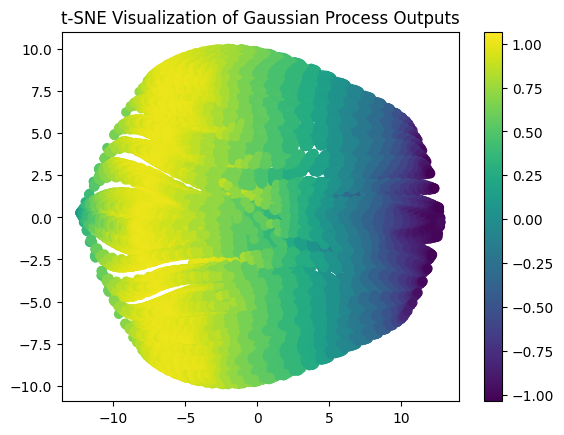

In [9]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Create a grid in R^5
grid_size = 10
X = np.linspace(0, 1, grid_size)
grid_points = np.array(np.meshgrid(X, X, X, X, X)).T.reshape(-1, 5)

# Step 2: Define and train a Gaussian process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Dummy training data
X_train = np.random.rand(100, 5)
y_train = np.sin(np.sum(X_train, axis=1))
gp.fit(X_train, y_train)

# Evaluate the Gaussian process on the grid points
y_pred, sigma = gp.predict(grid_points, return_std=True)

# Step 3: Combine the grid points with the function values
data = np.hstack((grid_points, y_pred.reshape(-1, 1)))

# Step 4: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_2d = tsne.fit_transform(data)

# Step 5: Visualize the results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=y_pred, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Gaussian Process Outputs')
plt.show()


In [10]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a grid in R^5
grid_size = 10
X = np.linspace(0, 1, grid_size)
grid_points = np.array(np.meshgrid(X, X, X, X, X)).T.reshape(-1, 5)

# Step 2: Define and train a Gaussian process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Dummy training data
X_train = np.random.rand(100, 5)
y_train = np.sin(np.sum(X_train, axis=1))
gp.fit(X_train, y_train)

# Evaluate the Gaussian process on the grid points
y_pred, sigma = gp.predict(grid_points, return_std=True)

# Step 3: Combine the grid points with the function values
data = np.hstack((grid_points, y_pred.reshape(-1, 1)))

# Step 4: Apply t-SNE to reduce to 3D
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
data_3d = tsne.fit_transform(data)

# Step 5: 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=y_pred, cmap='viridis')

plt.colorbar(sc)
plt.title('3D t-SNE Visualization of Gaussian Process Outputs')
plt.show()


KeyboardInterrupt: 

In [12]:
from botorch import fit_gpytorch_mll
import numpy as np
import torch
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.kernels import ScaleKernel, RBFKernel
from gpytorch.means import ConstantMean
from openTSNE import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a grid in R^5
grid_size = 10
X = np.linspace(0, 1, grid_size)
grid_points = np.array(np.meshgrid(X, X, X, X, X)).T.reshape(-1, 5)

# Step 2: Define and train a Gaussian process model using botorch
X_train = torch.rand(100, 5)
y_train = torch.sin(X_train.sum(dim=1))

gp = SingleTaskGP(X_train, y_train.unsqueeze(-1))
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

# Evaluate the Gaussian process on the grid points
grid_points_torch = torch.tensor(grid_points, dtype=torch.float32)
gp.eval()
with torch.no_grad():
    y_pred = gp(grid_points_torch).mean.numpy()

# Step 3: Combine the grid points with the function values
data = np.hstack((grid_points, y_pred.reshape(-1, 1)))

# Step 4: Apply t-SNE to reduce to 2D using openTSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_2d = tsne.fit(data[:, :-1])

# Step 5: 3D Plot with z-dimension as the output
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_2d[:, 0], data_2d[:, 1], y_pred, cmap='viridis')

plt.colorbar(sc)
plt.title('3D t-SNE Visualization of Gaussian Process Outputs with openTSNE and botorch')
plt.show()


/tmp/ipykernel_1018/727107258.py:21: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  gp = SingleTaskGP(X_train, y_train.unsqueeze(-1))
/home/matthijs/bsc/BachelorProject/.venv/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.5262]), std = tensor([0.4070])). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


KeyboardInterrupt: 

In [19]:
import numpy as np
import torch
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from openTSNE import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a grid in R^5
grid_size = 10
X = np.linspace(0, 1, grid_size)
grid_points = np.array(np.meshgrid(X, X, X, X, X)).T.reshape(-1, 5)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Define and train a Gaussian process model using botorch
X_train = torch.rand(100, 5, device=device, dtype=torch.double)
y_train = torch.sin(X_train.sum(dim=1)).to(device)

gp = SingleTaskGP(X_train, y_train.unsqueeze(-1))
mll = ExactMarginalLogLikelihood(gp.likelihood, gp).to(device)
fit_gpytorch_mll(mll)

# Evaluate the Gaussian process on the grid points
grid_points_torch = torch.tensor(grid_points, dtype=torch.float32).to(device)
gp.eval()
with torch.no_grad():
    y_pred = gp(grid_points_torch).mean.cpu().numpy()

# Step 3: Combine the grid points with the function values
data = np.hstack((grid_points, y_pred.reshape(-1, 1)))

# Step 4: Apply t-SNE to reduce to 2D using openTSNE with GPU support
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, n_jobs=4, neighbors="exact", initialization="pca", negative_gradient_method="fft", random_state=42)
data_2d = tsne.fit(data)

# Step 5: 3D Plot with z-dimension as the output
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_2d[:, 0], data_2d[:, 1], data_2d[:, 2], c=data_2d, cmap='viridis')
# ax.plot_surface(data_2d[:, 0], data_2d[:, 1], y_pred, cmap='viridis')

plt.colorbar(sc)
plt.title('3D t-SNE Visualization of Gaussian Process Outputs with openTSNE and botorch (GPU)')
plt.show()


/home/matthijs/bsc/BachelorProject/.venv/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.4558], device='cuda:0', dtype=torch.float64), std = tensor([0.4589], device='cuda:0', dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


RuntimeError: Interpolation based t-SNE for >2 dimensions is currently unsupported (and generally a bad idea)

In [17]:
import numpy as np
import torch
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from openTSNE import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_gp_surface_with_uncertainty(gp_model: SingleTaskGP, x_range: tuple, y_range: tuple, d_values: int,
                                     title: str = '') -> None:
    """
    Plots the 3D surface of the GP mean and uncertainty for different discrete values.

    :param gp_model: Trained GP model.
    :param x_range: Range of x values.
    :param y_range: Range of y values.
    :param d_values: Number of discrete values.
    :param title: Title for the plots.
    """
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    fig = plt.figure(figsize=(15, 10))

    for d in range(d_values):
        d_tensor = torch.tensor([d] * xy.shape[0]).view(-1, 1).to(device)
        xy_tensor = torch.tensor(xy, dtype=torch.float32).to(device)
        input_tensor = torch.cat((xy_tensor, d_tensor), dim=1)

        with torch.no_grad():
            posterior = gp_model.posterior(input_tensor)
            gp_mean, gp_var = posterior.mean, posterior.variance

        Z_mean = gp_mean.view(X.shape).cpu().numpy()
        Z_std = gp_var.view(X.shape).sqrt().cpu().numpy()  # Standard deviation

        # Mean surface plot
        ax_mean = fig.add_subplot(2, d_values, d + 1, projection='3d')
        ax_mean.plot_surface(X, Y, Z_mean, cmap='viridis')
        ax_mean.set_title(f'{title} Mean, a={d}')
        ax_mean.set_xlabel('x')
        ax_mean.set_ylabel('y')
        ax_mean.set_zlabel('μ(x, y, a)')

        # Standard deviation surface plot
        ax_std = fig.add_subplot(2, d_values, d + 1 + d_values, projection='3d')
        ax_std.plot_surface(X, Y, Z_std, cmap='viridis')
        ax_std.set_title(f'{title} Std Dev, a={d}')
        ax_std.set_xlabel('x')
        ax_std.set_ylabel('y')
        ax_std.set_zlabel('σ(x, y, a)')

    plt.show()

# Example usage:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a grid in R^5
grid_size = 10
X = np.linspace(0, 1, grid_size)
grid_points = np.array(np.meshgrid(X, X, X, X, X)).T.reshape(-1, 5)

# Define and train a Gaussian process model using botorch
X_train = torch.rand(100, 5, device=device)
y_train = torch.sin(X_train.sum(dim=1)).to(device)

gp = SingleTaskGP(X_train, y_train.unsqueeze(-1))
mll = ExactMarginalLogLikelihood(gp.likelihood, gp).to(device)
fit_gpytorch_mll(mll)

# Apply t-SNE to reduce to 2D using openTSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, n_jobs=4)
data_2d = tsne.fit(X_train.cpu().numpy()[:, :-1])

# Plot the GP surface with uncertainty
plot_gp_surface_with_uncertainty(gp, (0, 1), (0, 1), d_values=3, title='GP Surface')


/tmp/ipykernel_1018/1148392715.py:70: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  gp = SingleTaskGP(X_train, y_train.unsqueeze(-1))
/home/matthijs/bsc/BachelorProject/.venv/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.4774], device='cuda:0'), std = tensor([0.4656], device='cuda:0')). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 5 but got size 3 for tensor number 1 in the list.

<Figure size 1500x1000 with 0 Axes>